In [15]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn import preprocessing
%matplotlib inline 

In [18]:
# Load data to dataframe
data = np.load('LondonAQ.npz')
sites = data.keys() # ['GEltham', 'GWesthorne', 'BSladeGreen', 'GWoolwich']
headers = ['PM10', 'NO', 'NO2', 'O3', 'Wind Speed', 'month', 'dom', 'dow', 'hour', 'site']

df = pd.DataFrame(columns=headers)
site_idx = 0
for site in data.keys():
    shape = data[site].shape
    print(site, shape)
    site_data = np.empty((shape[0], shape[1] + 1))
    site_data.fill(site_idx)
    site_data[:,:-1] = data[site]
    site_df = pd.DataFrame(columns=headers, data=site_data)
    df = df.append(site_df)
    site_idx += 1

GEltham (43848, 9)
GWesthorne (43848, 9)
BSladeGreen (43848, 9)
GWoolwich (43848, 9)


In [19]:
df.head()

,PM10,NO,NO2,O3,Wind Speed,month,dom,dow,hour,site
0,12.4,0.0,5.7,54.4,2.8,1.0,1.0,6.0,0.0,0.0
1,7.4,0.4,5.7,51.9,2.9,1.0,1.0,6.0,1.0,0.0
2,9.7,0.0,5.7,51.2,2.2,1.0,1.0,6.0,2.0,0.0
3,3.3,0.0,4.8,51.9,2.7,1.0,1.0,6.0,3.0,0.0
4,4.4,0.0,3.3,51.4,2.4,1.0,1.0,6.0,4.0,0.0


In [20]:
# Missing values
train_data = df
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending = False)
missing_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
site,0,0.0
hour,0,0.0
dow,0,0.0
dom,0,0.0
month,0,0.0


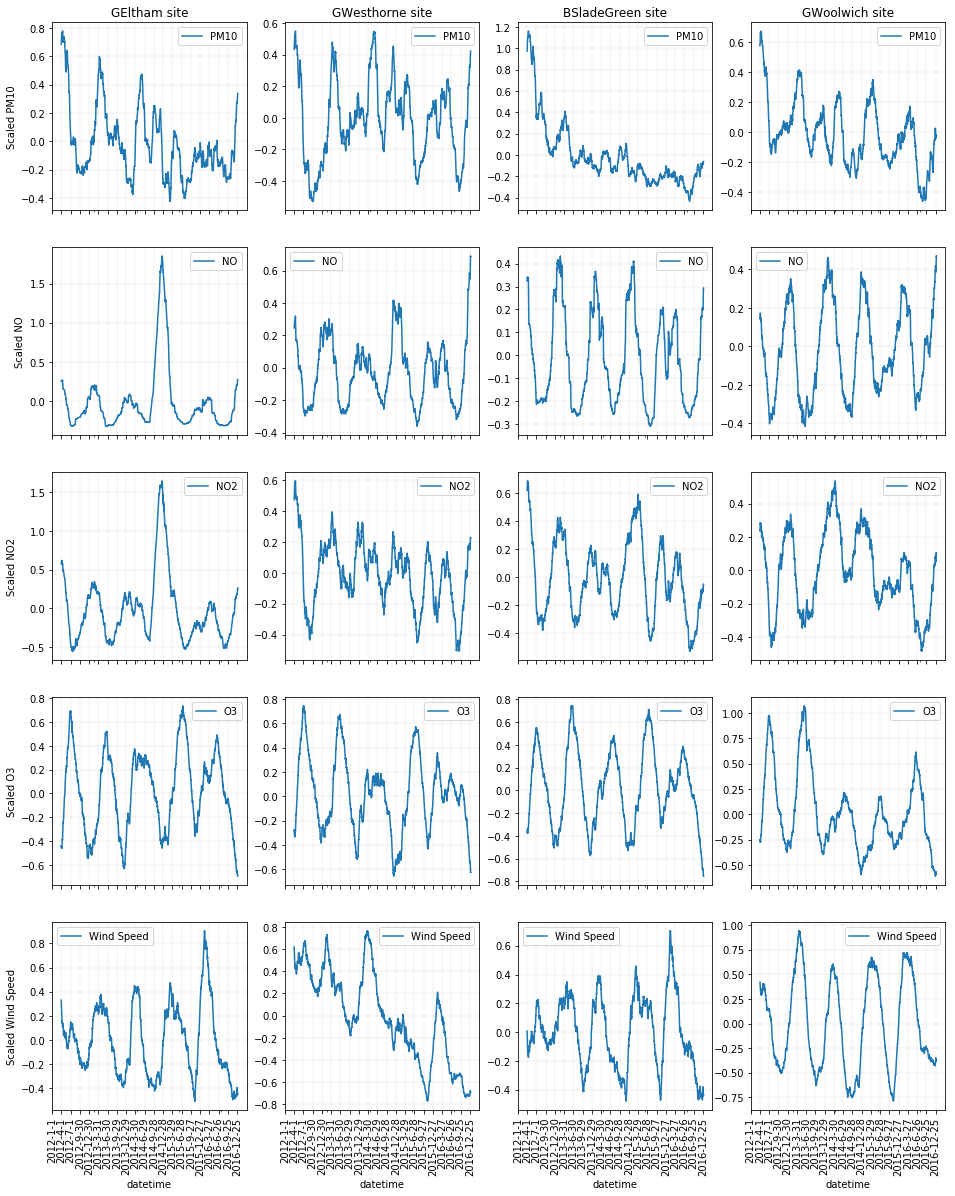

In [27]:
# Time series graph
scaler = preprocessing.StandardScaler()
sites = [0,1,2,3]
site_names = ['GEltham', 'GWesthorne', 'BSladeGreen', 'GWoolwich']
_vars = ['PM10', 'NO', 'NO2', 'O3', 'Wind Speed']
fig, axes = plt.subplots(nrows=len(_vars), ncols=len(sites), sharex='col')#, sharey='row')
figsize=(16,20)
window = 2184
x_ticks = range(0, 43848, window)
datetimes = [datetime(2012,1,1) + timedelta(hours=h) for h in x_ticks]
time = [str(d.year) + '-' + str(d.month) + '-' + str(d.day) for d in datetimes]                                    

plt_row=0
for var in _vars:
    plt_col=0
    for site in sites:      
        ax = axes[plt_row, plt_col]
        ax.set_xticklabels(time)
        ax.set_xticks(x_ticks)
        if plt_row == 0:
            ax.set_title(str(site_names[site]) + ' site')
        if plt_col == 0:
            ax.set(ylabel='Scaled ' + var)
        if plt_row == len(_vars)-1:
            ax.set(xlabel='datetime')
        plt_col+=1
    plt_row+=1
            
plt_row=0
for var in _vars:
    plt_col=0
    for site in sites:
        ax = axes[plt_row, plt_col]
        site_data = df[df['site'] == site][[var]].values
        x_scaled = scaler.fit_transform(site_data)
        ts = pd.DataFrame(data=x_scaled, columns=[var]).rolling(window=window,center=False).mean()
        ts.plot(ax=ax,figsize=figsize)
        plt_col+=1
    plt_row+=1

for ax in axes:
    for a in ax:
        a.set_xticklabels(time)
        a.grid(color='gray', linestyle='-', linewidth=0.1)
        for tick in a.get_xticklabels():
            tick.set_rotation(90)

fig.savefig('Cross-site var comparison matrix' + '.pdf', format='pdf'); 